<a href="https://colab.research.google.com/github/njiririkinyanjui/Heart_Disease_Prediction_Using_Neural_network/blob/main/Cleveland.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**DEFINE THE QUESTION**##

One of the prominent diseases that affect many people during middle or old age is heart disease, and in many cases it eventually leads to fatal complications. One-third of all global deaths are due to heart diseases. Half of the deaths in the United States and in other developed countries are due to heart ailment.

This classification model will predict whether the patient has heart disease or not based on various conditions/symptoms of their body.




##METRICS FOR SUCCESS##
Analysis the data, clean and build and implement the models below and determine which model perform better
We want to select a classifier model which predict the heart disease with at least 80 accuracy 

The following models will be used 

knn = KNeighborsClassifier

rf =  RandomForestClassifier

ab = AdaBoostClassifier

gb = GradientBoostingClassifier

NN = Model performance Binary method

SVM 

# **THE CONTEXT**

The Cleveland Heart Disease Database (CHDD) is considered the de facto database for heart disease research 
Age, sex, chest pain,resting blood presure, serum cholestoral, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved,exercise induced angina,ST depression induced by exercise relative to rest,the slope of the peak exercise ST segment, number of major vessels, and target are considered to be risk factors for heart disease, and hereditary risk factors such as high blood pressure and diabetes also lead to heart disease
We want to classified if patients have heart disease or not according to features given in the dataset. We will try to use this data to create a model which tries predict if a patient has this disease or not. We will use implement various model(classification) algorithm but we want to see if Neutral Network will perform compare to other models.

# Importing the libraries

In [1]:
# Loading the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


In [2]:
# Reading the data
cleveland = pd.read_csv("/content/processed.cleveland.data", encoding='latin-1', names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'], na_values='?')

## Previewing the dataset

In [3]:
# Reading and viewing the names data
with open('heart-disease.names') as description:
  names = description.read()
  print(names)

Publication Request: 
   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
   This file describes the contents of the heart-disease directory.

   This directory contains 4 databases concerning heart disease diagnosis.
   All attributes are numeric-valued.  The data was collected from the
   four following locations:

     1. Cleveland Clinic Foundation (cleveland.data)
     2. Hungarian Institute of Cardiology, Budapest (hungarian.data)
     3. V.A. Medical Center, Long Beach, CA (long-beach-va.data)
     4. University Hospital, Zurich, Switzerland (switzerland.data)

   Each database has the same instance format.  While the databases have 76
   raw attributes, only 14 of them are actually used.  Thus I've taken the
   liberty of making 2 copies of each database: one with all the attributes
   and 1 with the 14 attributes actually used in past experiments.

   The authors of the databases have requested:

      ...that any publications resulting from the use of th

##**Table 1. Feature information of the cleveland dataset**.

S.No	Attribute Name	Description	Range of Values


1. age - age in years
2. sex - sex (1 = male; 0 = female)
3. cp - chest pain type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 4 = asymptomatic)
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
5. chol - serum cholestoral in mg/dl
6. fbs - fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
7. restecg - resting electrocardiographic results (0 = normal; 1 = having ST-T
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest
11. slope - the slope of the peak exercise ST segment (1 = upsloping; 2 = flat; 3 = downsloping)
12. ca - number of major vessels (0-3) colored by flourosopy
13. thal - 3 = normal; 6 = fixed defect; 7 = reversable defect
14. target - the predicted attribute - diagnosis of heart disease (angiographic disease status) (Value 0 = < 50% diameter narrowing; Value 1 = > 50% 

In [4]:
# The cleveland sample of dataset preview
cleveland.sample(n=5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
18,48.0,0.0,3.0,130.0,275.0,0.0,0.0,139.0,0.0,0.2,1.0,0.0,3.0,0
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1
232,49.0,1.0,3.0,118.0,149.0,0.0,2.0,126.0,0.0,0.8,1.0,3.0,3.0,1
129,62.0,0.0,4.0,124.0,209.0,0.0,0.0,163.0,0.0,0.0,1.0,0.0,3.0,0
20,64.0,1.0,1.0,110.0,211.0,0.0,2.0,144.0,1.0,1.8,2.0,0.0,3.0,0


In [5]:
# Previewing the head of the our dataset
cleveland.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [6]:
# Previewing the tail of our dataset
cleveland.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,NaN,3.0,0


In [7]:
cleveland.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


## Data Cleaning

In [8]:
# Determining the number of records
print("cleveland shape:", cleveland.shape)


cleveland shape: (303, 14)


In [9]:
# Checking the info of each dataset
cleveland.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


In [10]:
#checking for duplicates of the cleveland
cleveland.duplicated().any()

False

* No duplicates cleveland dataset

In [11]:
# Checking for missing values in the cleveland dataset
cleveland.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

* There are 6 missing values in the cleveland datasets

In [12]:
# Dropping the missing values
cleveland = cleveland.dropna()
print(cleveland.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [13]:
cleveland[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'slope', 'ca', 'thal', 'target']] = cleveland[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'slope', 'ca', 'thal', 'target']].astype(int)

In [14]:
cleveland.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    int64  
 1   sex       297 non-null    int64  
 2   cp        297 non-null    int64  
 3   trestbps  297 non-null    int64  
 4   chol      297 non-null    int64  
 5   fbs       297 non-null    int64  
 6   restecg   297 non-null    int64  
 7   thalach   297 non-null    int64  
 8   exang     297 non-null    int64  
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    int64  
 11  ca        297 non-null    int64  
 12  thal      297 non-null    int64  
 13  target    297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 34.8 KB


In [15]:
# transform data to numeric to enable further analysis
cleveland = cleveland.apply(pd.to_numeric)
cleveland.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [16]:
# Checking for outliers

Q1 = cleveland.quantile(0.25)
Q3 = cleveland.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

age         13.0
sex          1.0
cp           1.0
trestbps    20.0
chol        65.0
fbs          0.0
restecg      2.0
thalach     33.0
exang        1.0
oldpeak      1.6
slope        1.0
ca           1.0
thal         4.0
target       2.0
dtype: float64


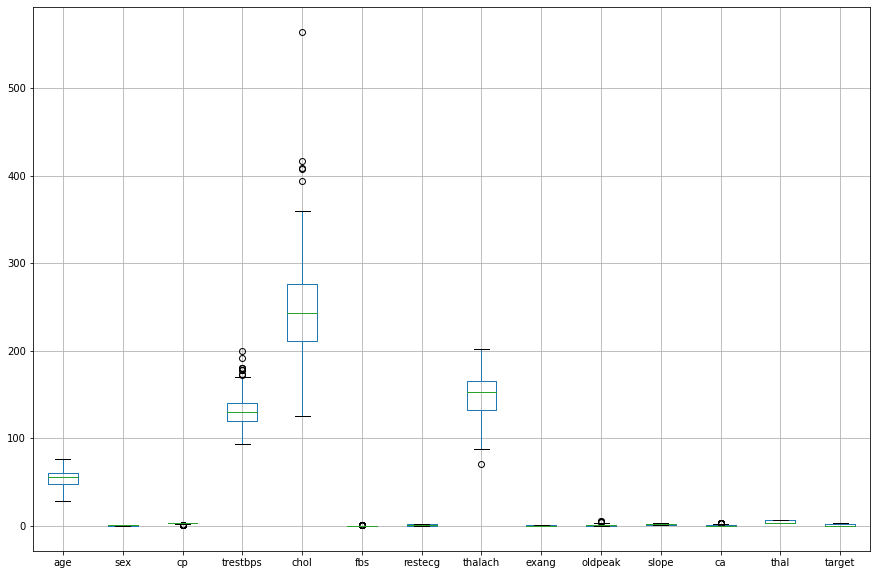

In [17]:
# Graphically showing the Outliers,
cleveland.boxplot(figsize=(15,10))
plt.show()

In [18]:
# eliminating outliers
df1_out = cleveland[~((cleveland < (Q1 - 1.5 * IQR)) |(cleveland > (Q3 + 1.5 * IQR))).any(axis=1)]
df1_out.shape

# Since we're losing most of the data after dropping the outliers we shall use the data with the outliers present
# around 75 lost attributes we don't drop outliers

(212, 14)

##Exploratory Data Analysis (EDA)##
The goal here is to find out more about the dataset.

1. What question(s) are you trying to solve?

2. What kind of data do we have and how do we treat different types?

3. What's missing from the data and how do you deal with it?

4. Where are the outliers and why should you care about them?

5. How can you add, change or remove features to get more out of your data?

* Univariate EDA

In [19]:
cleveland.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.946128
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,1.234551
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [20]:
cleveland.skew()

age        -0.219775
sex        -0.759727
cp         -0.844412
trestbps    0.700070
chol        1.118096
fbs         2.029240
restecg     0.006768
thalach    -0.536540
exang       0.743256
oldpeak     1.247131
slope       0.510444
ca          1.179548
thal        0.247772
target      1.046557
dtype: float64

* For the cleveland dataset the following features are skewed to left: age, sex, cp, and thalach

- We used a csv dataset to be able to see the relationship between the target variable with our dataset

In [21]:
heart = pd.read_csv("/content/heart (1).csv")

In [22]:
# Checking the values for the categorical columns

categorical_val = []
continous_val = []
for column in heart.columns:
    print('==============================')
    print(f"{column} : {heart[column].unique()}")
    if len(heart[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

age : [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
sex : [1 0]
cp : [3 2 1 0]
trestbps : [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
chol : [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 131]
fbs :

In [23]:
# Checking the column names
categorical_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

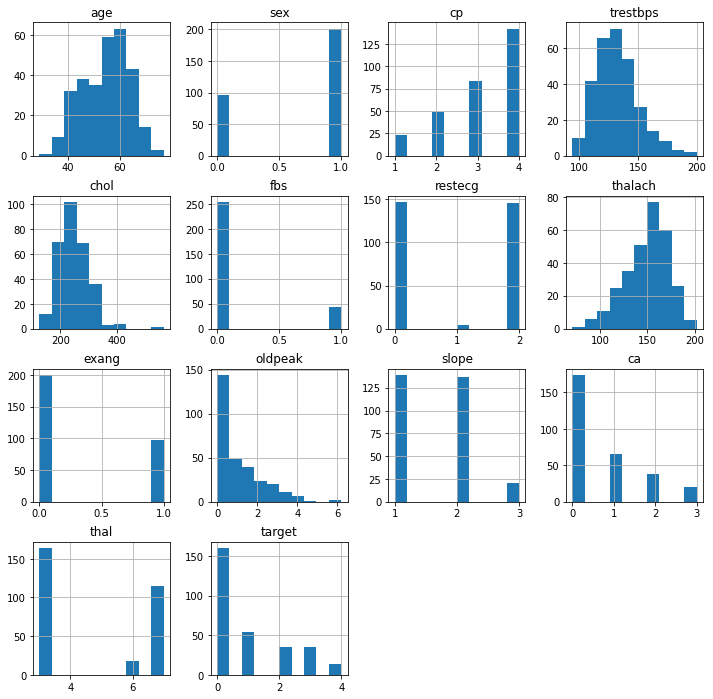

In [24]:
# plot histograms for each variable
cleveland.hist(figsize = (12, 12))
plt.show()

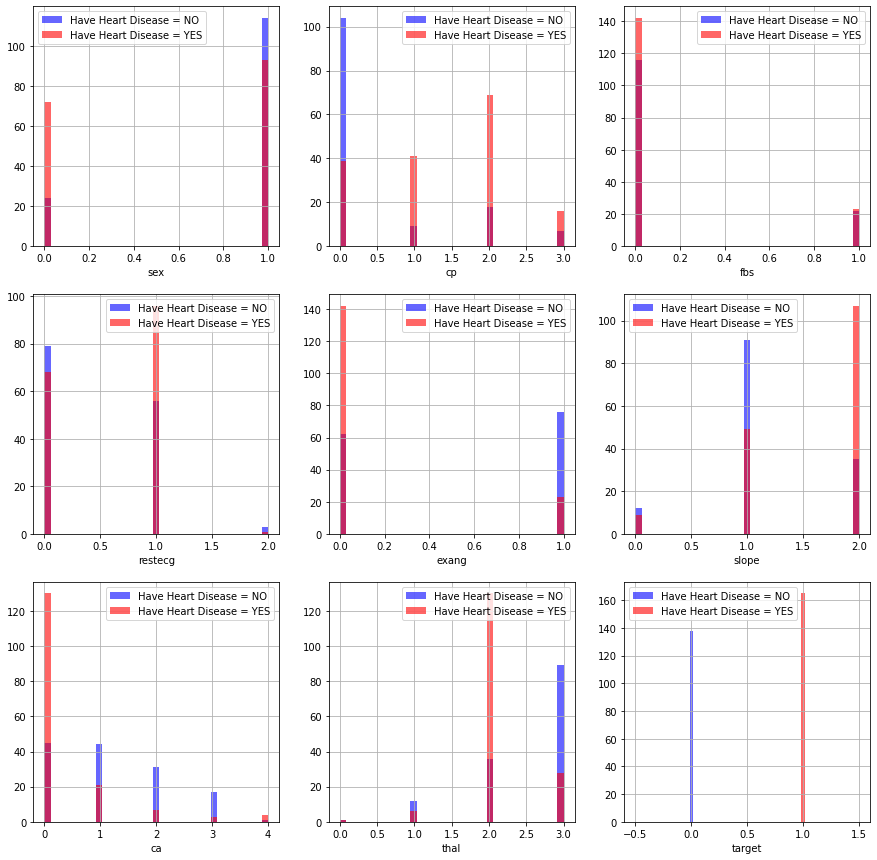

In [25]:
# Plotting the relationship betwen the target and various columns of our dataset
plt.figure(figsize=(15, 15))

for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    heart[heart["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    heart[heart["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

* cp {Chest Pain} : People with cp equl to 1, 2, 3 are more likely to have heart disease than people with cp equal to 0.
* restecg {resting electrocardiographic results} : People with value 1 (signals non-normal heart beat, can range from mild symptoms to severe problems) are more likely to have heart disease.
* exang {exercise induced angina} : People with value 0 (No ==> exercice induced angina) have heart disease more than people with value 1 (Yes ==> exercice induced angina)
* slope {the slope of the peak exercise ST segment} : People with slope value equal to 2 (Downslopins: signs of unhealthy heart) are more likely to have heart disease than people with slope value equal to 0 (Upsloping: better heart rate with excercise) or 1 (Flatsloping: minimal change (typical healthy heart)).
* ca {number of major vessels (0-3) colored by flourosopy} : the more blood movement the better so people with ca equal to 0 are more likely to have heart disease.
* thal {thalium stress result} : People with thal value equal to 2 (fixed defect: used to be defect but ok now) are more likely to have heart disease.
 3 = normal; 6 = fixed defect; 7 = reversable defect

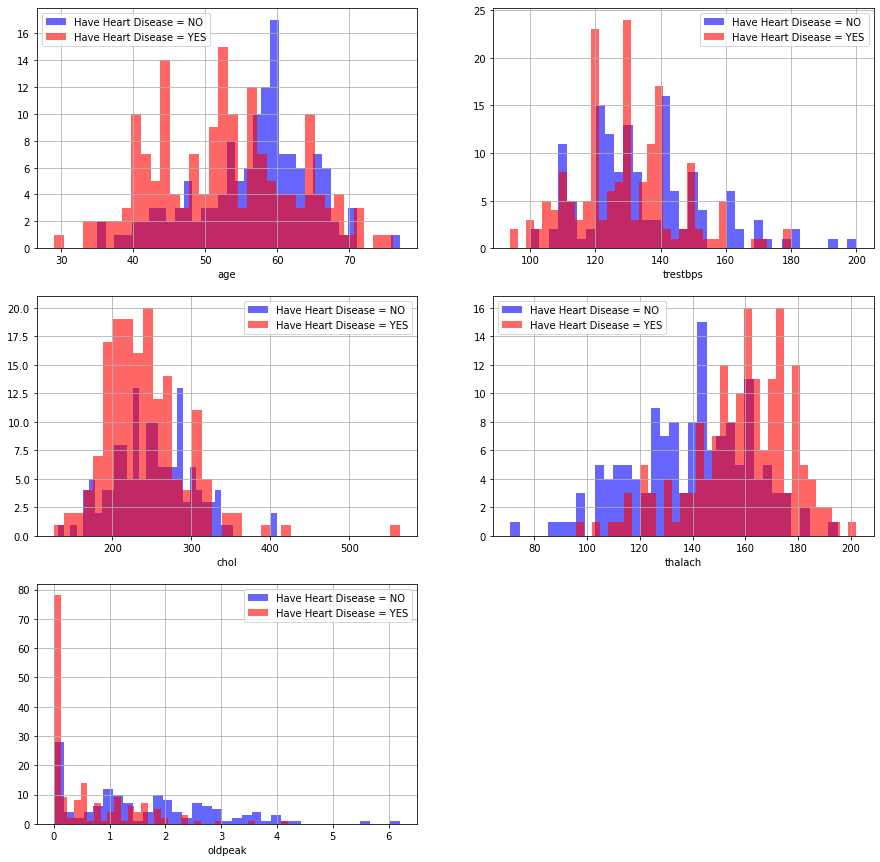

In [26]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(continous_val, 1):
    plt.subplot(3, 2, i)
    heart[heart["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    heart[heart["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

* trestbps : resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
* chol {serum cholestoral in mg/dl} : above 200 is cause for concern.
* thalach {maximum heart rate achieved} : People how acheived a maximum more than 140 are more likely to have heart disease.
* oldpeak ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more

**- Age vs. Max Heart Rate for Heart Disease**

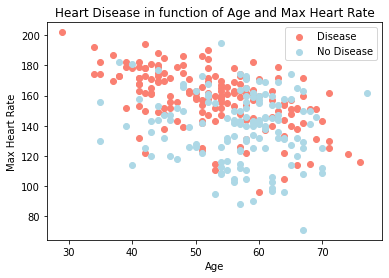

In [27]:
# Scatter with postivie examples
plt.scatter(heart.age[heart.target==1],
            heart.thalach[heart.target==1],
            c="salmon")

# Scatter with negative examples
plt.scatter(heart.age[heart.target==0],
            heart.thalach[heart.target==0],
            c="lightblue")

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

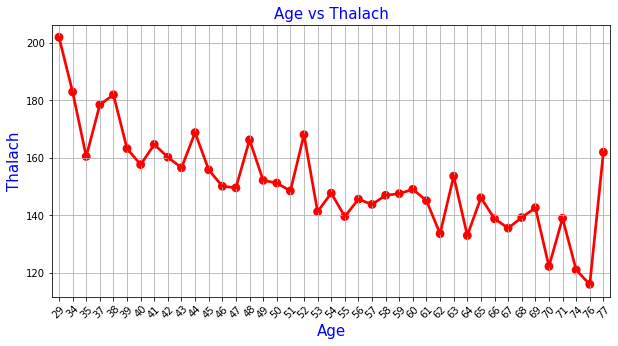

In [29]:
import seaborn as sns
age_unique=sorted(cleveland.age.unique())
age_thalach_values=cleveland.groupby('age')['thalach'].count().values
mean_thalach=[]
for i,age in enumerate(age_unique):
    mean_thalach.append(sum(cleveland[cleveland['age']==age].thalach)/age_thalach_values[i])
    
plt.figure(figsize=(10,5))
sns.pointplot(x=age_unique,y=mean_thalach,color='red',alpha=0.8)
plt.xlabel('Age',fontsize = 15,color='blue')
plt.xticks(rotation=45)
plt.ylabel('Thalach',fontsize = 15,color='blue')
plt.title('Age vs Thalach',fontsize = 15,color='blue')
plt.grid()
plt.show()

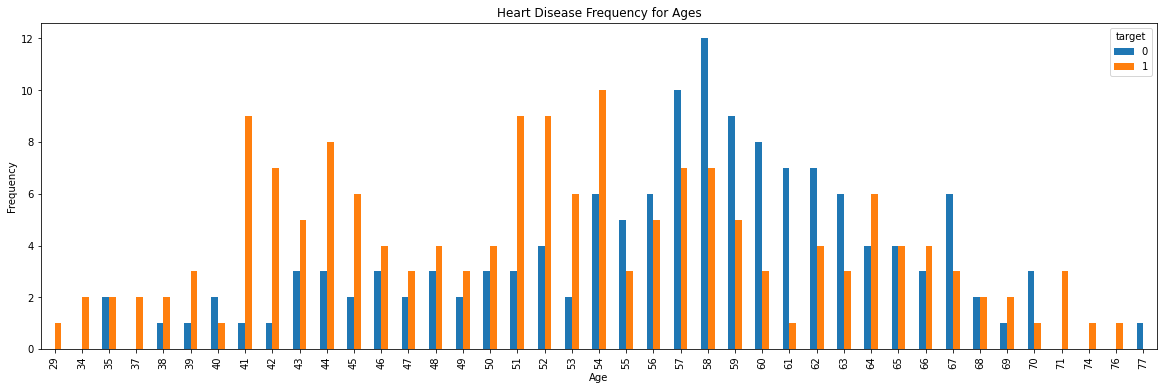

In [30]:
pd.crosstab(heart.age,heart.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [31]:
heart.target.value_counts()

# We have 165 person with heart disease and 138 person without heart disease, so our problem is balanced.

1    165
0    138
Name: target, dtype: int64

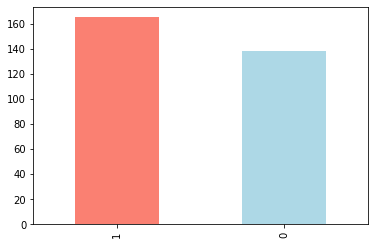

In [32]:
# A bar plot for the target variable
heart.target.value_counts().plot(kind="bar", color=["salmon", "lightblue"])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


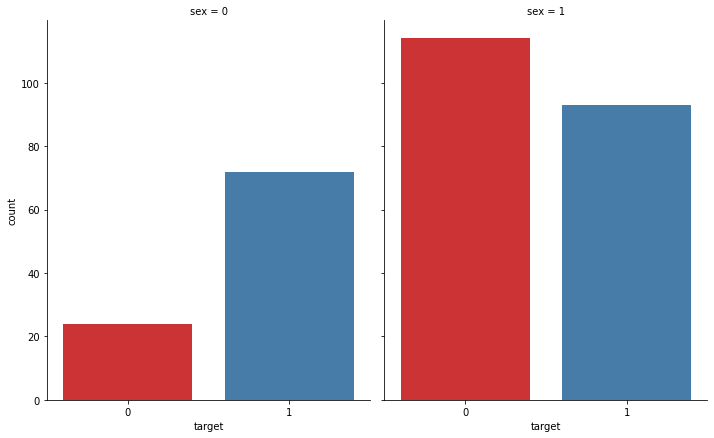

In [33]:
#Finding out the number of patients for both genders
sns.catplot("target", col="sex", col_wrap=4, data=heart, kind="count", height=6, aspect=.8, palette='Set1')
plt.show()

# 1 male
# 0 female
# 0 has no heart disease/ < 50
# 1 has heart disease / > 50
# males are more likely to have heart disease compared to females

* We just used the heart csv for our univariate analysis

* Bivariate EDA

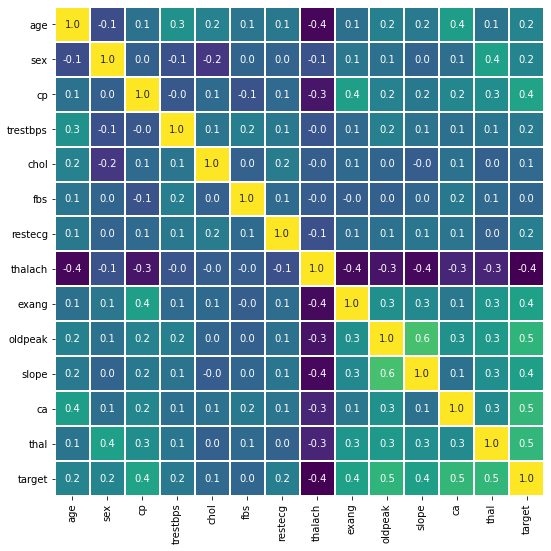

In [34]:
# Exploring the correlation between numerical variables
import seaborn as sns

plt.figure(figsize=(13,9))
sns.heatmap(cleveland.corr(), annot=True, cbar=False, cmap='viridis', linewidth=1, fmt='.1f', square=True)
plt.show()

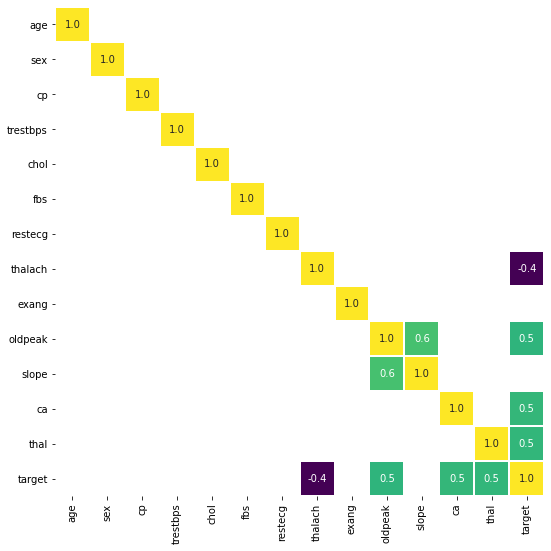

In [35]:
# Showing attributes with a correlation >= 3

plt.figure(figsize=(13,9))
corr = cleveland.corr()
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], annot=True, cbar=False,
                                 cmap='viridis', linewidth=1, fmt='.1f', square=True)

# Implementing the Solution

## Baseline Models

In [36]:
# Importing other used libraries
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns; sns.set(font_scale=1.2)
from sklearn.svm import SVC
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix,accuracy_score
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [37]:
cleveland[['thal', 'ca']] = cleveland[['thal', 'ca']].astype(float)

In [38]:
cleveland.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca          float64
thal        float64
target        int64
dtype: object

In [39]:
X = cleveland.drop(['target'], axis=1)
y = cleveland['target']

# Data Reduction
# Is PCA the best method here?
# Applying the reduction algorithm: PCA
# from sklearn import decomposition
# pca = decomposition.PCA(n_components=5).fit(X)
# X = pca.transform(X)
# X.shape

In [40]:
#  Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [41]:
# scaling data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [71]:
# Classification task
# Random Forest
# Ada Boost Classifier
# Neutral Networks
# Naive Bayes Classifier
# SVMs: linear, rbf, polynomial

In [42]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics


In [43]:
seed = 42

In [44]:
# Baseline models
# svm = SVR()
knn = KNeighborsClassifier(n_jobs = -1)
rf =  RandomForestClassifier(n_jobs = -1, random_state = seed)
ab = AdaBoostClassifier(random_state = seed)
gb = GradientBoostingClassifier(random_state = seed)

In [45]:

def train_test_split_score(model):
    from sklearn.metrics import accuracy_score
    from sklearn.model_selection import train_test_split
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3, random_state = seed)
    model.fit(X_train, Y_train)
    prediction = model.predict(X_test)
    accuracy_score = metrics.accuracy_score(Y_test, prediction)
    classification_report = metrics.classification_report(Y_test, prediction)
    return accuracy_score
    


In [46]:
models = [knn, rf, ab, gb]
model_list = ['knn', 'rf', 'ab', 'gb']
for i, j in zip(models, model_list):
  print("Algorithm is", j, train_test_split_score(i))

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Algorithm is knn 0.5
Algorithm is rf 0.5777777777777777
Algorithm is ab 0.5333333333333333
Algorithm is gb 0.5555555555555556


- Changing the random state to 42 produced an error of [sklearn error ValueError: Input contains NaN, infinity or a value too large for dtype('float64')], hence recommending using a random state of 0

## SVM

In [47]:
import seaborn as sns; sns.set(font_scale=1.2)
# Import Suport Vector Classifier module from svm library. We'll use SVC to model our data
from sklearn.svm import SVC,LinearSVC
from sklearn.model_selection import train_test_split
# Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import  accuracy_score
from sklearn.metrics import confusion_matrix

In [48]:
# Seperating the target from our data
X = cleveland.drop(['target'], axis=1) # We remove diagnosis column since its our target column and id because its not relevant in diagnosis. 
y = cleveland['target']

#  Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
y_test.shape

(60,)

In [49]:
# Let's now build the svm model 
data = SVC(kernel = 'linear')
# Train the model using the training set
data.fit(X_train,y_train)

# Predict the response for the test set
y_pred = data.predict(X_test)
y_pred

array([0, 0, 3, 0, 0, 0, 0, 0, 2, 1, 0, 0, 2, 0, 0, 0, 1, 0, 2, 0, 1, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 3, 0, 0, 2, 0, 0, 3, 0, 0,
       0, 0, 3, 0, 0, 0, 3, 3, 1, 0, 0, 2, 0, 1, 0, 0])

In [50]:
# Now that we have trained our model, let's test how well it can predict the 

# Checking the accurancy of the model
model_accuracy = accuracy_score(y_test,y_pred)
model_accuracy

# We've gotten a classification rate of 96.05%. This is a pretty good accuracy score 

# For further evaluation you can also check the confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[27,  2,  1,  0,  0],
       [ 9,  1,  1,  1,  0],
       [ 1,  2,  1,  3,  0],
       [ 1,  1,  3,  1,  0],
       [ 2,  2,  0,  1,  0]])

In [51]:
model_accuracy

0.5

### Poly

In [52]:
poly = svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovo').fit(X_train, y_train)

In [53]:
# Making the prediction
# making prediction
y_pred = poly.predict(X_test)

In [54]:
# Model Evaluation
print('Poly Accuracy Score:', accuracy_score(y_test, y_pred))

Poly Accuracy Score: 0.5


In [ ]:
print(confusion_matrix(y_test, y_pred))

### RBF

In [56]:
# Building the model 
rbfclassifier = SVC(kernel='rbf')
# Training the model using the training set
rbfclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [57]:
# making prediction
y_pred = rbfclassifier.predict(X_test)

In [58]:
# Model Evaluation
print('RBFclassifier Accuracy Score:', accuracy_score(y_test, y_pred))

RBFclassifier Accuracy Score: 0.5


In [ ]:
print(confusion_matrix(y_test, y_pred))

### Sigmoid

In [59]:
# Building the model 
sigclassifier = SVC(kernel='sigmoid')
# Training the model using the training set
sigclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [60]:
# making prediction
y_pred = sigclassifier.predict(X_test)

In [61]:
# Model Evaluation
print('Sigmoidclassifier Accuracy Score:', accuracy_score(y_test, y_pred))

Sigmoidclassifier Accuracy Score: 0.5


In [ ]:
print(confusion_matrix(y_test, y_pred))

# Neural networks

In [62]:
X = np.array(cleveland.drop(['target'], 1))
y = np.array(cleveland['target'])

In [63]:
X.shape

(297, 13)

In [64]:
y.shape

(297,)

In [65]:
# create X and Y datasets for training
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, stratify=y, random_state=42, test_size = 0.2)

In [66]:
# scaling data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [67]:
# Importing the libraries

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers

## Model performance Binary method

In [68]:
# convert into binary classification problem - heart disease or no heart disease
Y_train_binary = y_train.copy()
Y_test_binary = y_test.copy()

Y_train_binary[Y_train_binary > 0] = 1
Y_test_binary[Y_test_binary > 0] = 1

print(Y_train_binary[:20])

[1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0]


In [69]:
# define a new keras model for binary classification
def create_binary_model():
    # create model
    model = Sequential()
    model.add(Dense(16, input_dim=13, kernel_initializer='normal',  kernel_regularizer=regularizers.l2(0.001),activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(8, kernel_initializer='normal',  kernel_regularizer=regularizers.l2(0.001),activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile model
    adam = Adam(lr=0.001)
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

binary_model = create_binary_model()

print(binary_model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                224       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 369
Trainable params: 369
Non-trainable params: 0
_________________________________________________________________
None


In [70]:
# fit the binary model on the training data
history=binary_model.fit(X_train, Y_train_binary, validation_data=(X_test, Y_test_binary), epochs=50, batch_size=10)

Epoch 1/50
24/24 [==============================] - 0s 11ms/step - loss: 0.6885 - accuracy: 0.6118 - val_loss: 0.6759 - val_accuracy: 0.7833
Epoch 2/50
24/24 [==============================] - 0s 4ms/step - loss: 0.6662 - accuracy: 0.7342 - val_loss: 0.6402 - val_accuracy: 0.8500
Epoch 3/50
24/24 [==============================] - 0s 4ms/step - loss: 0.6427 - accuracy: 0.7679 - val_loss: 0.6000 - val_accuracy: 0.8500
Epoch 4/50
24/24 [==============================] - 0s 4ms/step - loss: 0.5977 - accuracy: 0.8101 - val_loss: 0.5477 - val_accuracy: 0.8500
Epoch 5/50
24/24 [==============================] - 0s 4ms/step - loss: 0.5552 - accuracy: 0.8186 - val_loss: 0.4944 - val_accuracy: 0.8500
Epoch 6/50
24/24 [==============================] - 0s 4ms/step - loss: 0.5180 - accuracy: 0.8354 - val_loss: 0.4450 - val_accuracy: 0.8667
Epoch 7/50
24/24 [==============================] - 0s 4ms/step - loss: 0.5068 - accuracy: 0.8059 - val_loss: 0.4086 - val_accuracy: 0.8667
Epoch 8/50
24/24 [=

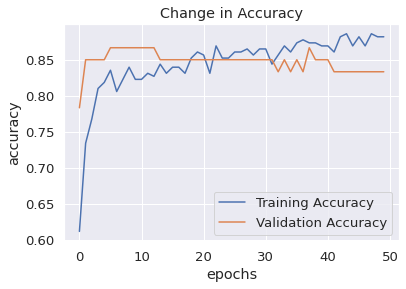

In [71]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Change in Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

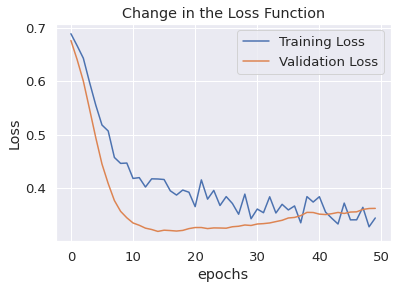

In [72]:
# Plotting the loss function vs epochs

plt.figure(1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Change in the Loss Function')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [73]:
# generate classification report using predictions for binary model
from sklearn.metrics import classification_report, accuracy_score
# generate classification report using predictions for binary model 
binary_pred = np.round(binary_model.predict(X_test)).astype(int)

print('Results for Binary Model')
print(accuracy_score(Y_test_binary, binary_pred))
print(classification_report(Y_test_binary, binary_pred))

Results for Binary Model
0.8333333333333334
              precision    recall  f1-score   support

           0       0.82      0.88      0.85        32
           1       0.85      0.79      0.81        28

    accuracy                           0.83        60
   macro avg       0.83      0.83      0.83        60
weighted avg       0.83      0.83      0.83        60



# Conclusion

* For the baseline methods the folowing was the performance of the models
-- Algorithm is knn 0.5
-- Algorithm is rf 0.5777777777777777
-- Algorithm is ab 0.5333333333333333
-- Algorithm is gb 0.5555555555555556
* the rf performed better to any other model of the algorithm


* For the classifiers the following was the score
-- Poly Accuracy Score: 0.5
-- RBFclassifier Accuracy Score: 0.5
-- Sigmoidclassifier Accuracy Score: 0.5

* the models performed equally the same

* The neural network model of the binary model performed as follows
-- Results for Binary Model  0.8333333333333334

* We were able to improve the model performance with the neural network
* The accuracy score improved the model performance, hence able to improve on our prediction